# CALCOLO OPINION LEADER

### Importazione librerire e dataframes

In [16]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

In [17]:
tweet_users = pd.read_csv("../datasets/twitter/twitter_users.csv")
tweet_collection = pd.read_csv("../datasets/twitter/twitter_tweet_collection.csv")
# Importazione picco negativo
tweets_picco_0_neg = pd.read_csv("../dataframes/tweets_filtrati_picco_0_negativo_token_9032.csv")
# Importazione picchi positivi
tweets_picco_0_pos = pd.read_csv("../dataframes/tweets_filtrati_picco_0_token_6563.csv")
tweets_picco_1_pos = pd.read_csv("../dataframes/tweets_filtrati_picco_1_token_4037.csv")
tweets_picco_2_pos = pd.read_csv("../dataframes/tweets_filtrati_picco_2_token_12247.csv")
tweets_picco_3_pos = pd.read_csv("../dataframes/tweets_filtrati_picco_4_token_4704.csv")
tweets_picco_4_pos = pd.read_csv("../dataframes/tweets_filtrati_picco_3_token_8898.csv")

### Merge dei tweet e la descrizione degli autori di tali tweet per ogni picco

In [18]:
merge_data_neg_0_description = pd.merge(tweets_picco_0_neg, tweet_users, left_on='author_id', right_on='user_id').drop(columns=['user_id'])
merge_0_neg = pd.merge(merge_data_neg_0_description, tweet_collection, left_on='tweet_id', right_on='tweet_id')

merge_data_0_description = pd.merge(tweets_picco_0_pos, tweet_users, left_on='author_id', right_on='user_id').drop(columns=['user_id'])
merge_0_pos = pd.merge(merge_data_0_description, tweet_collection, left_on='tweet_id', right_on='tweet_id')

merge_data_1_description = pd.merge(tweets_picco_1_pos, tweet_users, left_on='author_id', right_on='user_id').drop(columns=['user_id'])
merge_1_pos = pd.merge(merge_data_1_description, tweet_collection, left_on='tweet_id', right_on='tweet_id')

merge_data_2_description = pd.merge(tweets_picco_2_pos, tweet_users, left_on='author_id', right_on='user_id').drop(columns=['user_id'])
merge_2_pos = pd.merge(merge_data_2_description, tweet_collection, left_on='tweet_id', right_on='tweet_id')

merge_data_3_description = pd.merge(tweets_picco_3_pos, tweet_users, left_on='author_id', right_on='user_id').drop(columns=['user_id'])
merge_3_pos = pd.merge(merge_data_3_description, tweet_collection, left_on='tweet_id', right_on='tweet_id')

merge_data_4_description = pd.merge(tweets_picco_4_pos, tweet_users, left_on='author_id', right_on='user_id').drop(columns=['user_id'])
merge_4_pos = pd.merge(merge_data_4_description, tweet_collection, left_on='tweet_id', right_on='tweet_id')

# Token negativo 9032

### GRAFO DELLA CLUSTERIZZAZIONE DELLA KMEANS (3) per token 9032

Utilizzo il metodo della silhoutte per trovare qual'è il miglior k (ossia il miglior numero di cluster) per la riuscita della ricerca

In [19]:
# Seleziona le colonne rilevanti per il clustering
X = merge_0_neg[['retweet_count', 'like_count', 'quote_count', 'reply_count']]

# Calcola i punteggi Silhouette per k che varia da 2 a 4
silhouette_scores = []
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Per n_clusters = {k}, la media silhouette_score è: {silhouette_avg}")

# Trova il valore di k che massimizza il punteggio di Silhouette
best_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Indice del massimo + 2 per ottenere il valore reale di k

# Applica il metodo k-means con il miglior valore di k
kmeans = KMeans(n_clusters=best_k, random_state=0)
merge_0_neg['cluster'] = kmeans.fit_predict(X)

# Mappa i cluster a etichette personalizzate
cluster_mapping = {0: 'Weak opinion leader', 1: 'Strong opinion leader'}  # Personalizza le etichette come desiderato
merge_0_neg['opinion_leader'] = merge_0_neg['cluster'].map(cluster_mapping)

#stampa opinion leader
print("\n********************************************************************\n")
print("Tweet nella classe 'Strong opinion leader':")
print(merge_0_neg[merge_0_neg['opinion_leader'] == 'Strong opinion leader'][['retweet_count', 'like_count', 'quote_count', 'reply_count', 'author_id', 'tweet_id', 'content', 'description', 'Sentiment', 'collection']])
print()

For n_clusters = 2, the average silhouette_score is : 0.9934366165486519
For n_clusters = 3, the average silhouette_score is : 0.9873122318436764
For n_clusters = 4, the average silhouette_score is : 0.979974796885924

********************************************************************

Tweet nella classe 'Strong opinion leader':
      retweet_count  like_count  quote_count  reply_count  \
16             5293       25737           96           30   
1459           9156       51067           75          100   

                author_id             tweet_id  \
16    1346168171187863553  1452425209655480323   
1459   942461740041801733  1453065896923176961   

                                                content  \
16    Some fox Childe doodles 🦊 https : //t.co/p7DWl...   
1459           bestie doodles https : //t.co/PCDSs8PuXg   

                                            description Sentiment collection  
16    uhhh hi... i draw sometimes • 22 • she/her • p...   Neutral    doodle

Troviamo quindi che k=2 ha il valore di sihlouette migliore per la clusterizzazione di questo dataframe, per questo utilizziamo solo due classi (top OL e weak OL)

### GRAFICO K-MEANS per token 9032

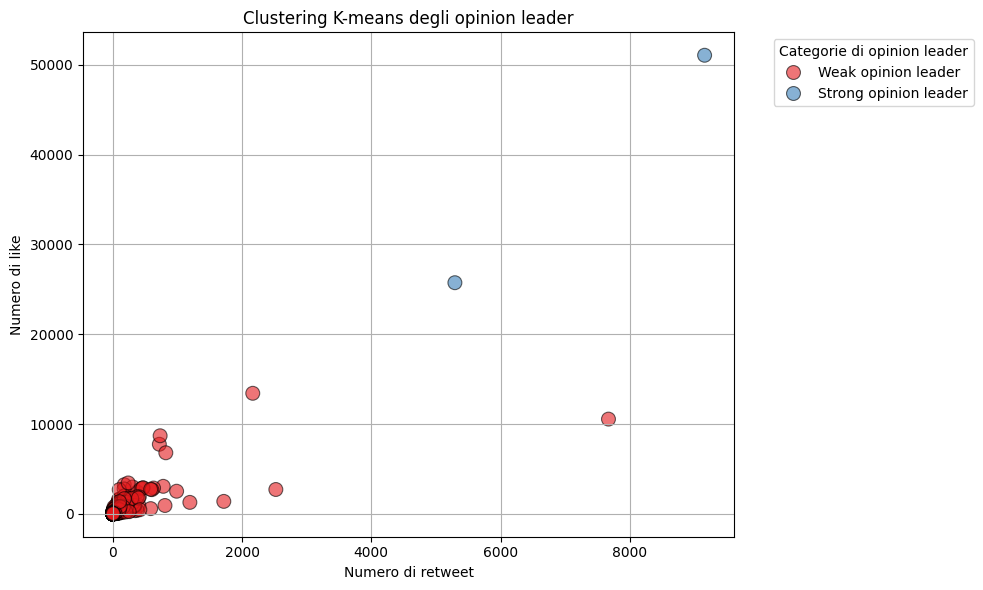

In [20]:
# Grafico dei cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merge_0_neg,
    x='retweet_count',
    y='like_count',
    hue='opinion_leader',
    palette='Set1',
    s=100,
    alpha=0.6,
    edgecolor='black'
)

plt.xlabel('Numero di retweet')
plt.ylabel('Numero di like')
plt.title('Clustering K-means degli opinion leader')
plt.legend(title='Categorie di opinion leader', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # Migliora la disposizione degli elementi nel grafico
plt.show()

# Token positivo 6563

### GRAFO DELLA CLUSTERIZZAZIONE DELLA KMEANS (3) per token 6563

In [21]:
# Seleziona le colonne rilevanti per il clustering
X = merge_0_pos[['retweet_count', 'like_count', 'quote_count', 'reply_count']]

# Calcola i punteggi Silhouette per k che varia da 2 a 4
silhouette_scores = []
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Per n_clusters = {k}, la media silhouette_score è: {silhouette_avg}")

# Trova il valore di k che massimizza il punteggio di Silhouette
best_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Indice del massimo + 2 per ottenere il valore reale di k

# Applica il metodo k-means con il miglior valore di k
kmeans = KMeans(n_clusters=best_k, random_state=0)
merge_0_pos['cluster'] = kmeans.fit_predict(X)

# Mappa i cluster a etichette personalizzate
cluster_mapping = {0: 'Weak opinion leader', 1: 'Strong opinion leader'}  # Personalizza le etichette come desiderato
merge_0_pos['opinion_leader'] = merge_0_pos['cluster'].map(cluster_mapping)

#stampa opinion leader
print("\n********************************************************************\n")
print("Tweet nella classe 'Strong opinion leader':")
print(merge_0_pos[merge_0_pos['opinion_leader'] == 'Strong opinion leader'][['retweet_count', 'like_count', 'quote_count', 'reply_count', 'author_id', 'tweet_id', 'content', 'description', 'Sentiment', 'collection']])
print()

For n_clusters = 2, the average silhouette_score is : 0.9842941068839618
For n_clusters = 3, the average silhouette_score is : 0.963584852098141
For n_clusters = 4, the average silhouette_score is : 0.8924131062556514

********************************************************************

Tweet nella classe 'Strong opinion leader':
      retweet_count  like_count  quote_count  reply_count  \
209             505        9964            4           15   
276            2313       15736           35          178   
454            3033       15873           21           41   
680            4238       15563          134           52   
884            2839       14313          266          129   
1377           1363       17387           77          396   
1380           1637       20345            8           36   

                author_id             tweet_id  \
209   1374890890179710979  1426246024406863873   
276   1096947589755428864  1425864262795341825   
454            2954090659  1

##### GRAFICO K-MEANS per token 6563

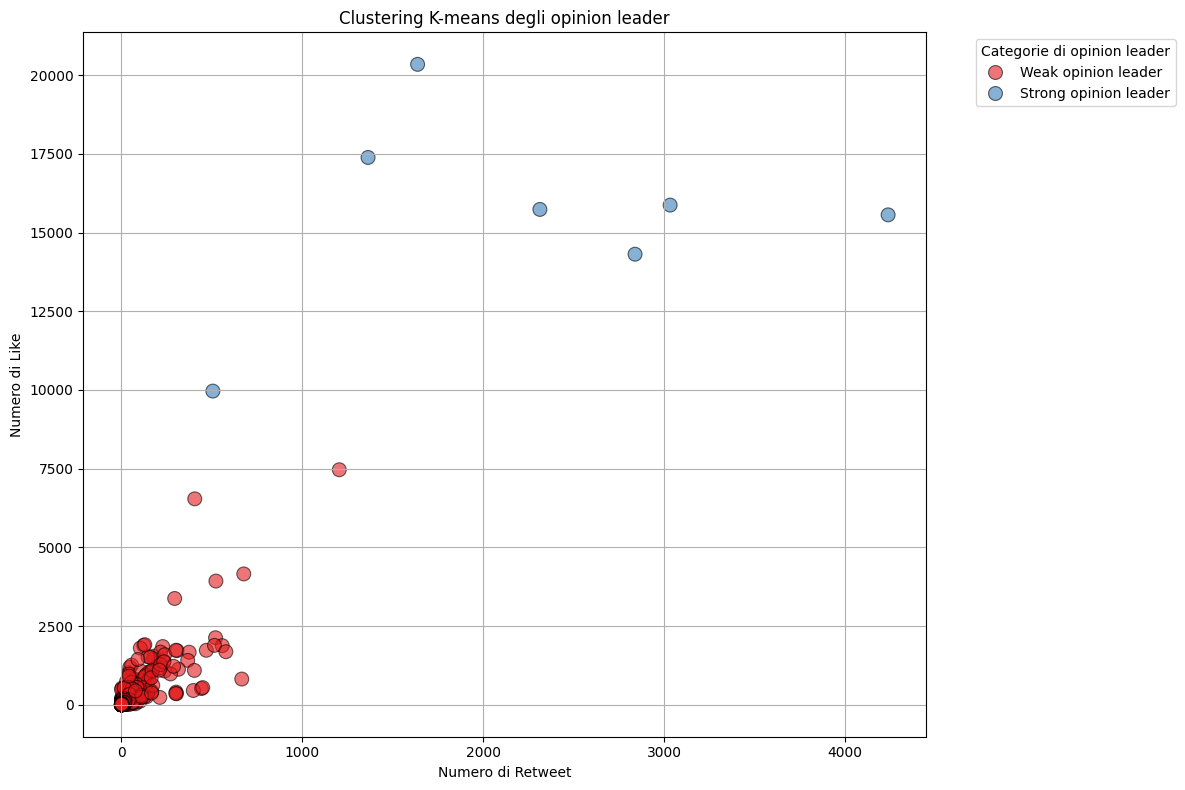

In [22]:
# Grafico dei cluster
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=merge_0_pos,
    x='retweet_count',
    y='like_count',
    hue='opinion_leader',
    palette='Set1',
    s=100,
    alpha=0.6,
    edgecolor='black' 
)

plt.xlabel('Numero di Retweet')
plt.ylabel('Numero di Like')
plt.title('Clustering K-means degli opinion leader')
plt.legend(title='Categorie di opinion leader', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # Migliora la disposizione degli elementi nel grafico
plt.show()

# Token positivo 4037

### GRAFO DELLA CLUSTERIZZAZIONE DELLA KMEANS (3) per token 4037

In [23]:
# Seleziona le colonne rilevanti per il clustering
X = merge_1_pos[['retweet_count', 'like_count', 'quote_count', 'reply_count']]

# Calcola i punteggi Silhouette per k che varia da 2 a 4
silhouette_scores = []
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Per n_clusters = {k}, la media silhouette_score è: {silhouette_avg}")

# Trova il valore di k che massimizza il punteggio di Silhouette
best_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Indice del massimo + 2 per ottenere il valore reale di k

# Applica il metodo k-means con il miglior valore di k
kmeans = KMeans(n_clusters=best_k, random_state=0)
merge_1_pos['cluster'] = kmeans.fit_predict(X)

# Mappa i cluster a etichette personalizzate
cluster_mapping = {0: 'Weak opinion leader', 1: 'Strong opinion leader'}  # Personalizza le etichette come desiderato
merge_1_pos['opinion_leader'] = merge_1_pos['cluster'].map(cluster_mapping)

#stampa opinion leader
print("\n********************************************************************\n")
print("Tweet nella classe 'Strong opinion leader':")
print(merge_1_pos[merge_1_pos['opinion_leader'] == 'Strong opinion leader'][['retweet_count', 'like_count', 'quote_count', 'reply_count', 'author_id', 'tweet_id', 'content', 'description', 'Sentiment', 'collection']])
print()

For n_clusters = 2, the average silhouette_score is : 0.9830652848432722
For n_clusters = 3, the average silhouette_score is : 0.9301996443391447
For n_clusters = 4, the average silhouette_score is : 0.8993435781759644

********************************************************************

Tweet nella classe 'Strong opinion leader':
      retweet_count  like_count  quote_count  reply_count  \
1515           1723       11801           17           64   

                author_id             tweet_id  \
1515  1025339104865730560  1456036497958768642   

                                                content  \
1515  reagan doodles # InsideJob https : //t.co/qsHd...   

                                            description Sentiment collection  
1515  Juice | SPOILERS | multifandom! im into like 4...   Neutral    doodles  



### GRAFICO K-MEANS per token 4037

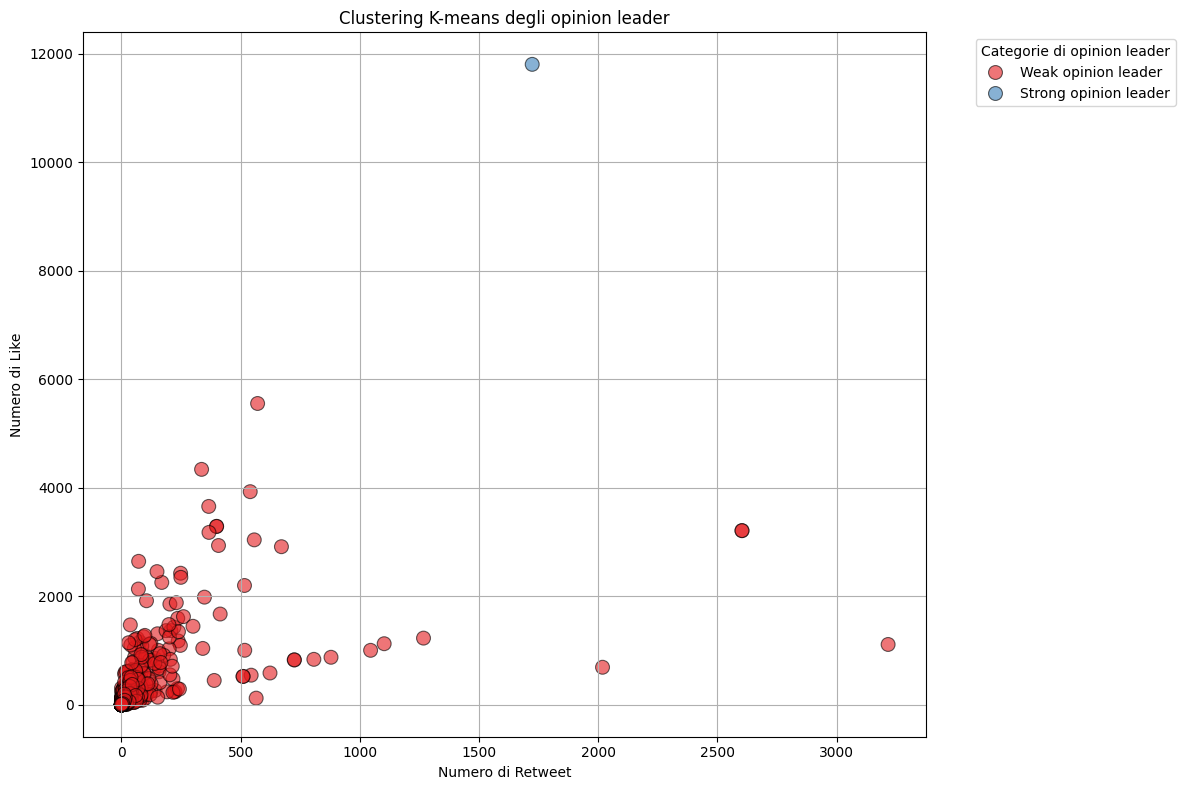

In [24]:
# Grafico dei cluster
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=merge_1_pos,
    x='retweet_count',
    y='like_count',
    hue='opinion_leader',
    palette='Set1',
    s=100,
    alpha=0.6,
    edgecolor='black' 
)

plt.xlabel('Numero di Retweet')
plt.ylabel('Numero di Like')
plt.title('Clustering K-means degli opinion leader')
plt.legend(title='Categorie di opinion leader', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # Migliora la disposizione degli elementi nel grafico
plt.show()

# Token positivo 12247

### GRAFO DELLA CLUSTERIZZAZIONE DELLA KMEANS (3) per token 12247

In [25]:
# Seleziona le colonne rilevanti per il clustering
X = merge_2_pos[['retweet_count', 'like_count', 'quote_count', 'reply_count']]

# Calcola i punteggi Silhouette per k che varia da 2 a 4
silhouette_scores = []
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Per n_clusters = {k}, la media silhouette_score è: {silhouette_avg}")

# Trova il valore di k che massimizza il punteggio di Silhouette
best_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Indice del massimo + 2 per ottenere il valore reale di k

# Applica il metodo k-means con il miglior valore di k
kmeans = KMeans(n_clusters=best_k, random_state=0)
merge_2_pos['cluster'] = kmeans.fit_predict(X)

# Mappa i cluster a etichette personalizzate
cluster_mapping = {0: 'Weak opinion leader', 1: 'Strong opinion leader'}  # Personalizza le etichette come desiderato
merge_2_pos['opinion_leader'] = merge_2_pos['cluster'].map(cluster_mapping)

#stampa opinion leader
print("\n********************************************************************\n")
print("Tweet nella classe 'Strong opinion leader':")
print(merge_2_pos[merge_2_pos['opinion_leader'] == 'Strong opinion leader'][['retweet_count', 'like_count', 'quote_count', 'reply_count', 'author_id', 'tweet_id', 'content', 'description', 'Sentiment', 'collection']])
print()

For n_clusters = 2, the average silhouette_score is : 0.9195794313364481
For n_clusters = 3, the average silhouette_score is : 0.8712150593877823
For n_clusters = 4, the average silhouette_score is : 0.8478248380248247

********************************************************************

Tweet nella classe 'Strong opinion leader':
     retweet_count  like_count  quote_count  reply_count            author_id  \
50             625        2518            1           11  1212085986726797312   
67              62        1396            2            8           4033772715   
86             243        1975            0           12  1064583195650392064   
90             209        1595            2            9  1048173823051403264   
120            131        1711            2            8  1233806992378073091   
153            352        2707            0           15           3226609357   
205            221        1781            2           15  1069940255170666497   
224            200

### GRAFICO K-MEANS per token 12247

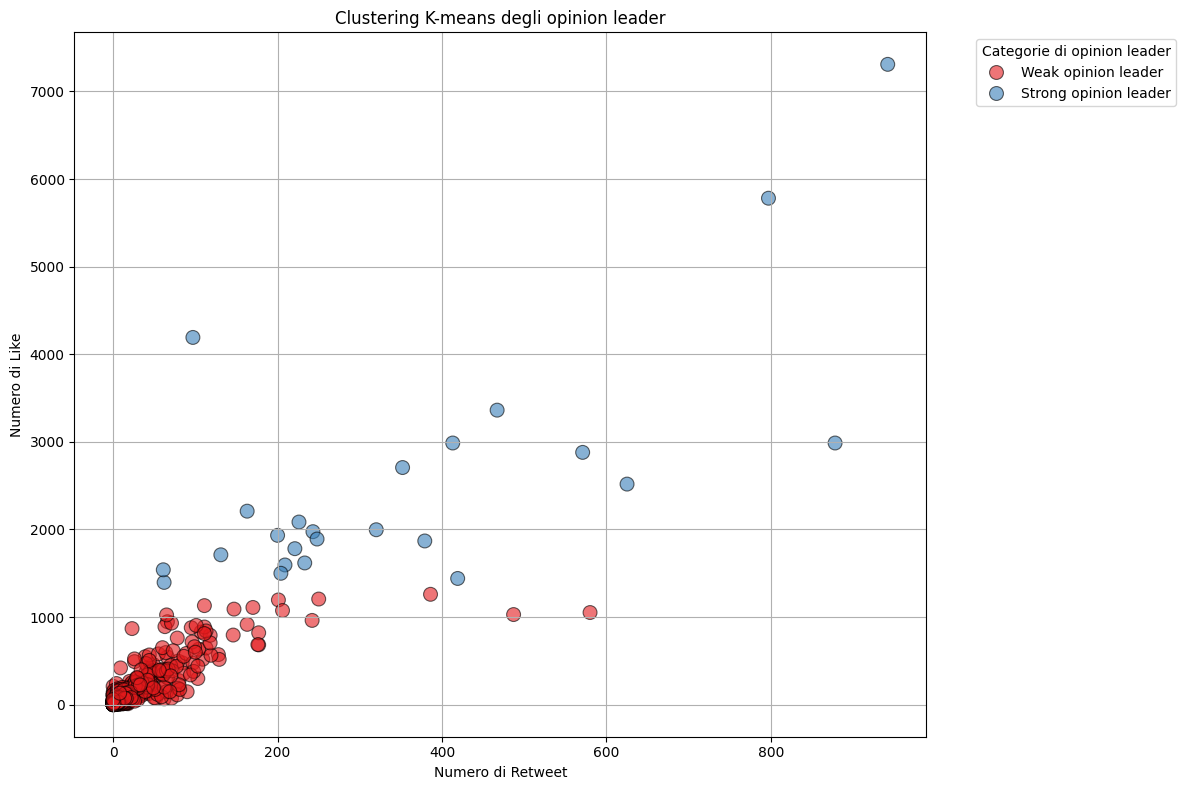

In [26]:
# Grafico dei cluster
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=merge_2_pos,
    x='retweet_count',
    y='like_count',
    hue='opinion_leader',
    palette='Set1',
    s=100,
    alpha=0.6,
    edgecolor='black'
)

plt.xlabel('Numero di Retweet')
plt.ylabel('Numero di Like')
plt.title('Clustering K-means degli opinion leader')
plt.legend(title='Categorie di opinion leader', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # Migliora la disposizione degli elementi nel grafico
plt.show()

# Token positivo 9728

### GRAFO DELLA CLUSTERIZZAZIONE DELLA KMEANS (3) per token 9728

In [27]:
# Seleziona le colonne rilevanti per il clustering
X = merge_3_pos[['retweet_count', 'like_count', 'quote_count', 'reply_count']]

# Calcola i punteggi Silhouette per k che varia da 2 a 4
silhouette_scores = []
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Per n_clusters = {k}, la media silhouette_score è: {silhouette_avg}")

# Trova il valore di k che massimizza il punteggio di Silhouette
best_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Indice del massimo + 2 per ottenere il valore reale di k

# Applica il metodo k-means con il miglior valore di k
kmeans = KMeans(n_clusters=best_k, random_state=0)
merge_3_pos['cluster'] = kmeans.fit_predict(X)

# Mappa i cluster a etichette personalizzate
cluster_mapping = {0: 'Weak opinion leader', 1: 'Strong opinion leader'}  # Personalizza le etichette come desiderato
merge_3_pos['opinion_leader'] = merge_3_pos['cluster'].map(cluster_mapping)

#stampa opinion leader
print("\n********************************************************************\n")
print("Tweet nella classe 'Strong opinion leader':")
print(merge_3_pos[merge_3_pos['opinion_leader'] == 'Strong opinion leader'][['retweet_count', 'like_count', 'quote_count', 'reply_count', 'author_id', 'tweet_id', 'content', 'description', 'Sentiment', 'collection']])
print()

For n_clusters = 2, the average silhouette_score is : 0.9898637972404183
For n_clusters = 3, the average silhouette_score is : 0.9557721394173333
For n_clusters = 4, the average silhouette_score is : 0.9518495320820443

********************************************************************

Tweet nella classe 'Strong opinion leader':
      retweet_count  like_count  quote_count  reply_count  \
289            1864       12618           50           53   
1675           1544       10547           53          392   
3740           1606       14171           14           11   

                author_id             tweet_id  \
289    871380288420667392  1471723900748763138   
1675  1043185714437992449  1471995935844704268   
3740            176228082  1472690879915823106   

                                                content  \
289   doodles Inko Good Mom shigaraki cause I desper...   
1675  Hunter sure quiet since sold crack doodles $ 5...   
3740          tiger doodles 🐯 https : //t.c

### GRAFICO K-MEANS per token 9728

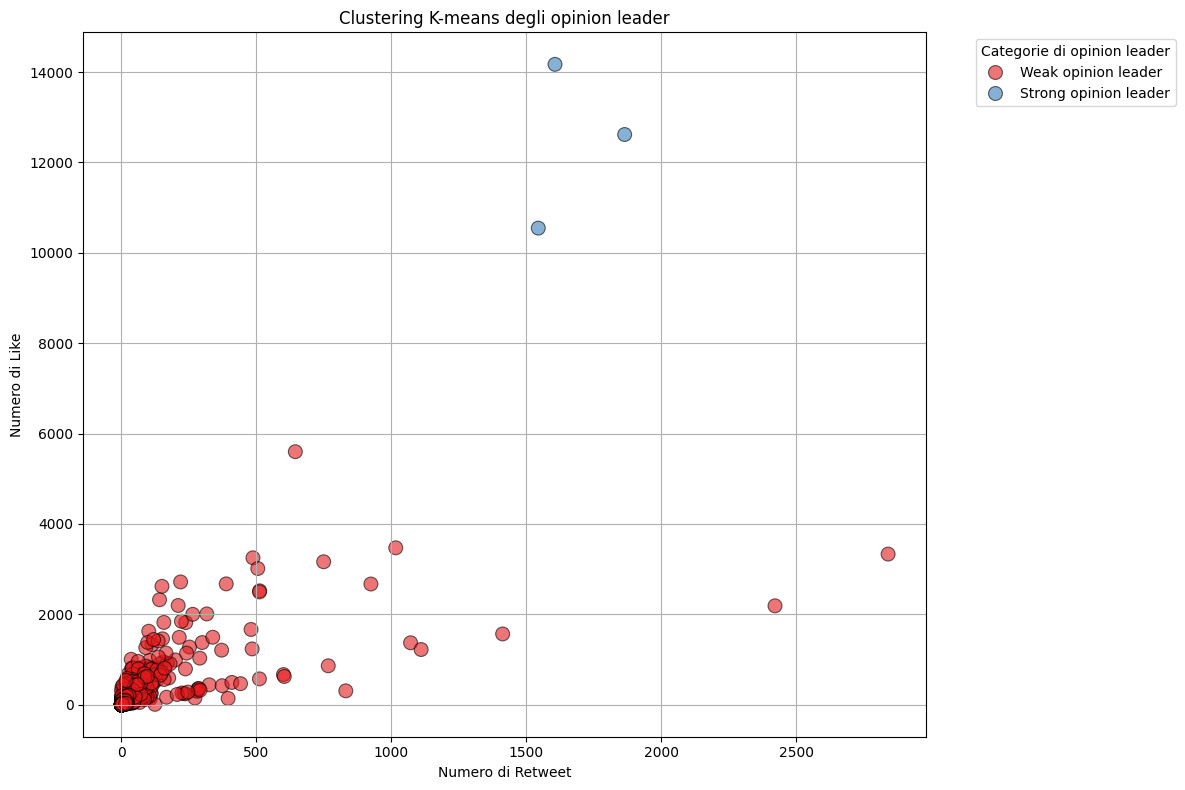

In [28]:
# Grafico dei cluster
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=merge_3_pos,
    x='retweet_count',
    y='like_count',
    hue='opinion_leader',
    palette='Set1',
    s=100,
    alpha=0.6,
    edgecolor='black' 
)

plt.xlabel('Numero di Retweet')
plt.ylabel('Numero di Like')
plt.title('Clustering K-means degli opinion leader')
plt.legend(title='Categorie di opinion leader', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # Migliora la disposizione degli elementi nel grafico
plt.show()

# Token positivo 8898

### GRAFO DELLA CLUSTERIZZAZIONE DELLA KMEANS (3) per token 8898

In [29]:
# Seleziona le colonne rilevanti per il clustering
X = merge_4_pos[['retweet_count', 'like_count', 'quote_count', 'reply_count']]

# Calcola i punteggi Silhouette per k che varia da 2 a 4
silhouette_scores = []
for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Per n_clusters = {k}, la media silhouette_score è: {silhouette_avg}")

# Trova il valore di k che massimizza il punteggio di Silhouette
best_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Indice del massimo + 2 per ottenere il valore reale di k

# Applica il metodo k-means con il miglior valore di k
kmeans = KMeans(n_clusters=best_k, random_state=0)
merge_4_pos['cluster'] = kmeans.fit_predict(X)

# Mappa i cluster a etichette personalizzate
cluster_mapping = {0: 'Weak opinion leader', 1: 'Strong opinion leader'}  # Personalizza le etichette come desiderato
merge_4_pos['opinion_leader'] = merge_4_pos['cluster'].map(cluster_mapping)

#stampa opinion leader
print("\n********************************************************************\n")
print("Tweet nella classe 'Strong opinion leader':")
print(merge_4_pos[merge_4_pos['opinion_leader'] == 'Strong opinion leader'][['retweet_count', 'like_count', 'quote_count', 'reply_count', 'author_id', 'tweet_id', 'content', 'description', 'Sentiment', 'collection']])
print()

For n_clusters = 2, the average silhouette_score is : 0.9418875233812839
For n_clusters = 3, the average silhouette_score is : 0.8959531001024026
For n_clusters = 4, the average silhouette_score is : 0.8509388924421342

********************************************************************

Tweet nella classe 'Strong opinion leader':
      retweet_count  like_count  quote_count  reply_count  \
133             637        2018           29            1   
266             603        2962            1           17   
295             584        5229            5           34   
433            1299        5427           12           24   
455            1003        8247            2           12   
583             428        2103            5           10   
605            1094        5447            4           10   
631             116        2769            0            8   
633             235        2674            1            5   
674              15        4256            0           2

### GRAFICO K-MEANS per token 8898

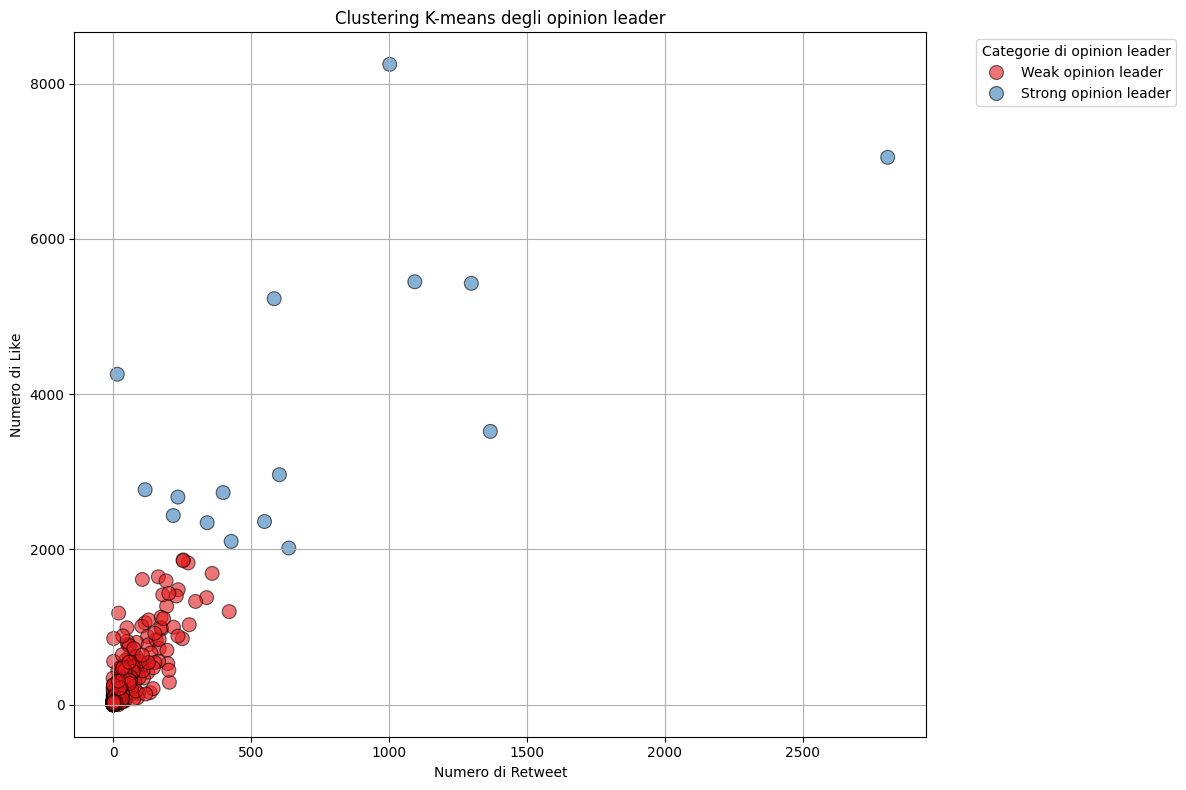

In [30]:
# Grafico dei cluster
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=merge_4_pos,
    x='retweet_count',
    y='like_count',
    hue='opinion_leader',
    palette='Set1',
    s=100,
    alpha=0.6,
    edgecolor='black' 
)

plt.xlabel('Numero di Retweet')
plt.ylabel('Numero di Like')
plt.title('Clustering K-means degli opinion leader')
plt.legend(title='Categorie di opinion leader', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # Migliora la disposizione degli elementi nel grafico
plt.show()